<a href="https://colab.research.google.com/github/doeungim/ADP_DE2/blob/main/%EB%AA%A8%EC%9D%985.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기계학습 (60점)

### 커머스 앱데이터
dataurl =https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/mock/001_m1.csv

데이터는 커머스 앱의 유저 로그에 관한 데이터이다.      
timestamp : event 발생시각    
event : 로그의 이벤트 명
- first_visit : 첫방문, 첫 방문시에는 구매를 하지 않는다
- visit : 앱방문
- visit_and_purchase : 앱방문 및 제품 구매     

params : 이벤트 상세
- source : 첫방문 유입 소스를 의미한다. search : 단순 검색 / promotion : 마케팅 / sns : sns유입
- product : 구매 제품   

age: 유저 나이    
gender : 유저 성별

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/mock/001_m1.csv')
df.head()

,user_id,timestamp,event,params,age,gender
0,668300627f964509a7f5b5f63b570d55,2024-02-18,first_visit,{'source': 'sns'},31,M
1,668300627f964509a7f5b5f63b570d55,2024-03-04,visit,NaN,31,M
2,668300627f964509a7f5b5f63b570d55,2024-03-16,visit,NaN,31,M
3,668300627f964509a7f5b5f63b570d55,2024-03-30,visit,NaN,31,M
4,668300627f964509a7f5b5f63b570d55,2024-04-26,visit_and_purchase,{'product': 'Clothing'},31,M


### 기계학습1
시각화를 포함한 데이터 EDA

In [2]:
# 날짜 처리
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Params 처리
# Nan의 값을 빈 딕셔너리로 처리한다 map(eval) : 딕셔너리로 만들어줌
df['params'] = df['params'].fillna('{}').map(eval)
df.head()

,user_id,timestamp,event,params,age,gender
0,668300627f964509a7f5b5f63b570d55,2024-02-18,first_visit,{'source': 'sns'},31,M
1,668300627f964509a7f5b5f63b570d55,2024-03-04,visit,{},31,M
2,668300627f964509a7f5b5f63b570d55,2024-03-16,visit,{},31,M
3,668300627f964509a7f5b5f63b570d55,2024-03-30,visit,{},31,M
4,668300627f964509a7f5b5f63b570d55,2024-04-26,visit_and_purchase,{'product': 'Clothing'},31,M


In [3]:
# 딕셔너리를 구분 할때에는 list로 변환해서 key와 value로 가져오기
df['param_key'] = df['params'].apply(lambda x : list(x.keys())[0] if x else None)
df['param_value'] = df['params'].apply(lambda x : list(x.values())[0] if x else None )

df.head()

,user_id,timestamp,event,params,age,gender,param_key,param_value
0,668300627f964509a7f5b5f63b570d55,2024-02-18,first_visit,{'source': 'sns'},31,M,source,sns
1,668300627f964509a7f5b5f63b570d55,2024-03-04,visit,{},31,M,None,None
2,668300627f964509a7f5b5f63b570d55,2024-03-16,visit,{},31,M,None,None
3,668300627f964509a7f5b5f63b570d55,2024-03-30,visit,{},31,M,None,None
4,668300627f964509a7f5b5f63b570d55,2024-04-26,visit_and_purchase,{'product': 'Clothing'},31,M,product,Clothing


### 기계학습2
유저의 7일차 31일차 앱 재방문율(리텐션)을 구하라.  

(추가설명)   
리텐션은 최초 앱방문일자를 기준으로 몇일 차 후에 또다시 방문했는지를    
전체 유저에 대해 데이터를 구하고 0일차 방문 횟수로 나누어 비율을 구한 값이다.   
- 아래와 같이 전체 일자에 대한 리텐션 결과를 구할 수 있다
![img](https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/mock/001_m2_img.png)
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>retention-proportion</th>
    </tr>
    <tr>
      <th>day</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>100.000000</td>
    </tr>
    <tr>
      <th>1</th>
      <td>69.519580</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1.264971</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1.251514</td>
    </tr>
    <tr>
      <th>4</th>
      <td>1.318800</td>
    </tr>
  </tbody>
</table>

In [4]:
# timestamp sorting 하기
result = df.sort_values(['user_id','timestamp'] , ascending = True).reset_index(drop = True)

# user_id별로 최초 방문 일자 추가
result['first_visit'] = result.groupby('user_id')['timestamp'].transform('min')

# 최초 방문에서 timestamp를 빼서 재방문까지의 경과일 추출
result['day'] = (result['timestamp'] - result['first_visit']).dt.days

# Retention-Proportaion 재방문까지의 경과일을 user_id.nuniuqe()로 나눔
retention_proportion = result['day'] / result['user_id'].size #68175

# 경과일별 방문수 - retention_counts
retention_counts =  result.groupby('day').size()

retention_propotion  = retention_counts / retention_counts.loc[0] * 100
retention_propotion.to_frame().rename({0 :'retention-proportion'})

retention_propotion.iloc[[7,31],]

,0
day,
7,1.991657
31,2.879828


### 기계학습3     
가입 후 한달동안의 유저 행동을 통해 다음달 첫주 동안의 물건 구매 여부를 확인하는 모델링을 진행하려고 한다.     
이를 위한 전처리를 진행하라.
- 유저별 가입 후 한달 동안의 메타정보에 대한 테이블 (자율구성)    
- 종속 변수 : 가입 후 한달 후 일주일 동안 물건 구매 여부 (0,1)

In [5]:
import datetime
# 가입 후 한달 0 ~ 30
# 다음달 첫주 : 31 ~ 37

# 방문 첫날이 2024-11-23보다 작고, 차이가 37 이하인 데이터만 추출
target = result[(result['first_visit'] <= pd.to_datetime('2024-11-23')) & (result['day'] <= 37)].reset_index(drop =True)

# 유저별 가입 후 한달 동안(0~30일) 의 메타정보 구성
# 가입 후 한달동안 user_id의 행동 카운트
meta = target[target['day'] < 31].groupby(['user_id','gender','age']).size().reset_index(name = 'activity_cnt')

# 총 구매 횟수- 전체 기간동안의 user_id의 방문 구매 횟수
purchase = target[target['event'] == 'visit_and_purchase']['user_id'].value_counts().reset_index(name = 'total_purchase')

# 방문횟수
visit =target[target['event'] == 'visit']['user_id'].value_counts().reset_index(name = 'visit_cnt')

# 구매 풀품
products = target[(target['day']<31)&(target['event']=='visit_and_purchase')][['user_id','param_value']].reset_index(drop= True)
dummies = pd.get_dummies(products['param_value'] , dtype =int)
product_dummies = pd.concat([products['user_id'], dummies], axis = 1)
product_dummies

# 가입 후 한달 후 일주일 동안 물건 구매 여부
y = target[(target['day'] > 30) & (target['event'] == 'visit_and_purchase')].groupby(['user_id']).size().reset_index(name = 'purchaseyn')


In [6]:
m1 = pd.merge(meta , purchase, how = 'left').fillna(0)
m2 = pd.merge(m1 , visit , how = 'left').fillna(0)
m3 = pd.merge(m2, product_dummies, how = 'left' ).fillna(0)
m4 = pd.merge(m3, y, how ='left').fillna(0)

# 구매가 1개 이상이면 1 , 아니면 0
m4['y'] = m4['purchaseyn'].apply(lambda x : 1 if x >= 1 else 0)
m4.head(4)


,user_id,gender,age,activity_cnt,total_purchase,visit_cnt,Beauty Products,Books,Clothing,Electronics,Groceries,Home & Kitchen,Movies & TV,Music,Sports,Toys,purchaseyn,y
0,001ce1bb72964d909bc319705b8ffdbf,F,48,2,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,001cec87aa1f4527b488781176ea3f25,F,25,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,001d54a6141b41e0b44b01e5512b37e4,F,44,3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,0024a606685141279f350d2fdfeb9f9a,F,28,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### 기계학습4     
2개의 분류 모델을 통해 학습을 진행하고 모델 평가를 진행하라    
유의미한 변수를 추출하라

In [7]:
#m4['y'].value_counts() - 불균형 데이터
# 전처리
m4['gender'] = m4['gender'].map({'M': 1, 'F' : 0})
X = m4.drop(columns = ['user_id','purchaseyn','y'], axis = 1)
y = m4['y']

from imblearn.over_sampling import SMOTE
sm = SMOTE()
sm_x , sm_y = sm.fit_resample(X, y)
print(sm_y.value_counts())

y
0    7255
1    7255
Name: count, dtype: int64


  Model  Accuracy_ score  F1_score
0    RF         0.991500  0.991508
1   xgb         0.992189  0.992220


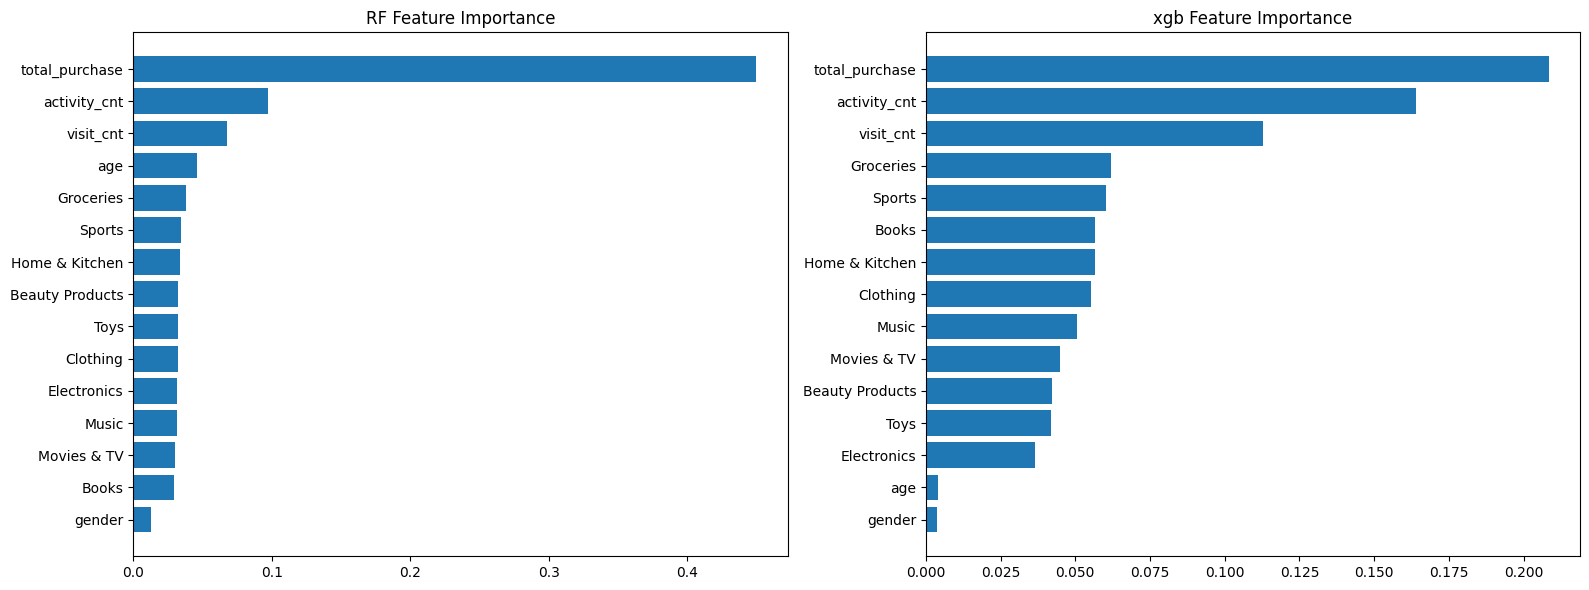

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

x_train, x_test, y_train, y_test = train_test_split(sm_x, sm_y, test_size = 0.3, random_state = 42)

def eval_model (name, model) :
  model.fit(x_train, y_train)
  pred = model.predict(x_test)
  acc = accuracy_score(y_test, pred)
  f1 = f1_score(y_test, pred)

  return name, acc, f1

res = []
model_lst = []
for name, model in [['RF', RandomForestClassifier()], ['xgb' , xgb.XGBClassifier()]] :
  name, acc, f1 = eval_model(name, model)
  res.append({
      'Model' : name,
      'Accuracy_ score' : acc,
      'F1_score' : f1
  })
  model_lst.append([name, model])

print(pd.DataFrame(res))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
for i, (name, model) in enumerate(model_lst) :
  imp = model.feature_importances_
  imp_name  = x_train.columns
  imp_series = pd.Series(imp, index = imp_name).sort_values()

  axes[i].barh(imp_series.index, imp_series.values)
  axes[i].set_title(f'{name} Feature Importance')

plt.tight_layout()
plt.show()


### 기계학습5     
모델 성능 개선을 위해 추가로 필요한 데이터를 개발팀에 요청하려한다.   
필요항목과 해당 항목을 요청하는 이유를 서술하라     

### 비트코인 가격 데이터   
dataurl =https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/mock/001_m2.csv

데이터는 특정기간 동안의 1분봉 비트코인 가격 데이터이다    
TIMESTAMP : timestamp
bitcoin($) : 비트코인가격(달러)


In [9]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/mock/001_m2.csv')
df.head()

,TIMESTAMP,bitcoin($)
0,1.577837e+09,7195.24
1,1.577837e+09,7187.67
2,1.577837e+09,7184.41
3,1.577837e+09,7183.83
4,1.577837e+09,7185.54


### 기계학습5    
결측치 대치 방법에 대해 논의하고 적절한 방법으로 주어진 데이터의 결측치를 처리하라       

In [10]:
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'], unit = 's')
df.columns = ['date','value']
df = df.set_index('date')
df.head()

,value
date,
2020-01-01 00:00:00,7195.24
2020-01-01 00:01:00,7187.67
2020-01-01 00:02:00,7184.41
2020-01-01 00:03:00,7183.83
2020-01-01 00:04:00,7185.54


In [11]:
df['value'] = df['value'].interpolate(method = 'linear')
print('''
선형 보간 - 시간의 흐름을 반영하여 자연스럽게 대치
''')


선형 보간 - 시간의 흐름을 반영하여 자연스럽게 대치



### 기계학습6     
데이터의 정상성을 통계적, 시각적 방법을 통해 확인하라.     

In [12]:
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose

print('''
1. 정상성
  - 시간에 따른 평균과 분산이 일정하고, 공분산이 시간 차이에만 의존하는 성질
  시각적 확인 : 추세가 있거나 분산이 변동되는 경우 > 비정상
              - Rolling 평균과 분산으로 직관적으로 파악

  통계적 확인 (p_value < 0.05 - 정상이다)
    귀무 : 비정상
    대립 : 정상

''')

# 원본 데이터 - 정상성 만족안함
adf = adfuller(df['value'])
print(f"{adf[1]:.2f}")


# 차분 1 적용후 다시 하기
adf_diff = adfuller(df['value'].diff(1).dropna(), regression = 'ct')
print(f"{adf_diff[1]:.2f}")


1. 정상성
  - 시간에 따른 평균과 분산이 일정하고, 공분산이 시간 차이에만 의존하는 성질
  시각적 확인 : 추세가 있거나 분산이 변동되는 경우 > 비정상
              - Rolling 평균과 분산으로 직관적으로 파악

  통계적 확인 (p_value < 0.05 - 정상이다)
    귀무 : 비정상
    대립 : 정상


0.69
0.00


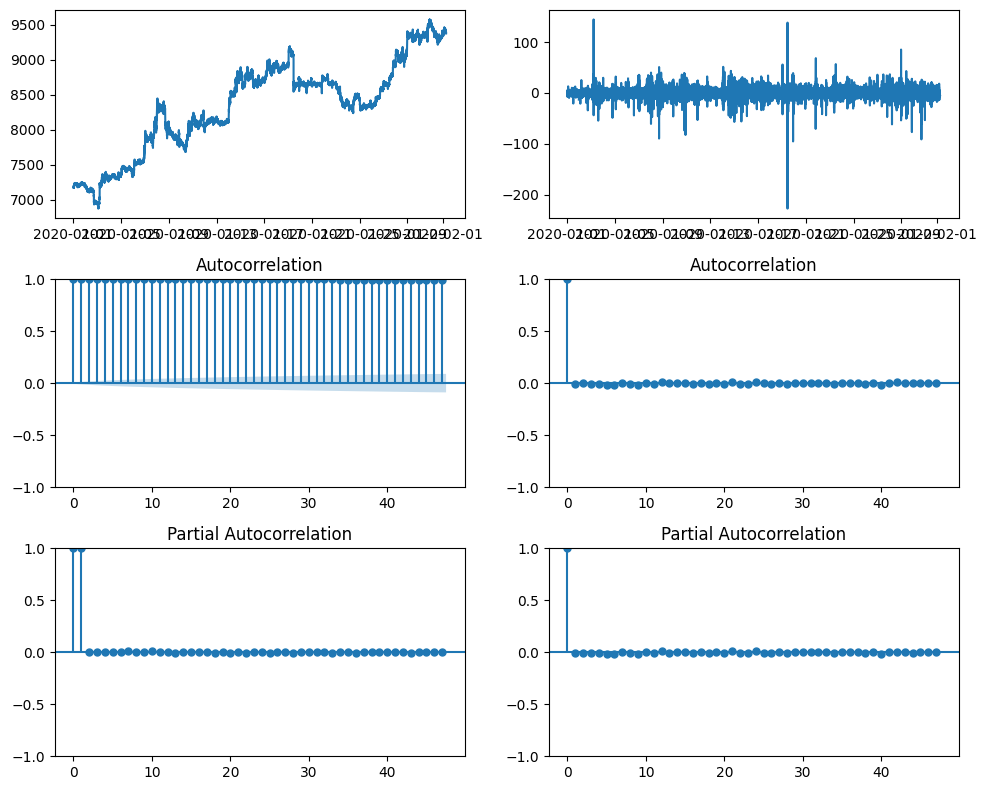

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose

df['diff_1'] = df['value'].diff(1).fillna(0)


fig, axes = plt.subplots(3, 2, figsize = (10, 8))

axes[0,0].plot(df.index, df['value'])
plot_acf(df['value'], axes[1,0])
plot_pacf(df['value'], axes[2,0])

axes[0,1].plot(df.index, df['diff_1'])
plot_acf(df['diff_1'], axes[1,1])
plot_pacf(df['diff_1'], axes[2, 1])

plt.tight_layout()
plt.show()

In [14]:
print('''
1. ACF
  - 시차가 있는 자기 상관관계를 측정 : 시차(lag)에 따라 값이 변동하는가? >> 자기 상관 있음
  - 비정상 : ACF가 천천히 감소 혹은 매우 높은 값 유지
  - 정상 : ACF가 빠르게 0에 수렴

  > ACF가 높게 유지되면, 과거의 값이 클수록 현재 값도 크다 (자기상관이 있음)
    이 경우, 비정상 시계열일 수 있음

2. PACF (Partial Autocorrelation Function)
  - PACF는 특정 시차에서의 순수한 자기상관 : 중간 시차의 영향을 제거한 상태에서의
    시점 T와 T-k 사이의 순수한 상관관계를 봄
    정상 시계열의 경우, PACF는 lag 1 이후 빠르게 0으로 수렴

  - AR(p) 모델의 차수를 추정할 때 사용
  - 정상 시계열에서는 첫 몇 개의 lag에서만 유의하게 나타나고 이후에는 0에 수렴

  원시 데이터
    - ACF - 비정상
    - PACF - lag(1,2)에서 유의 > AR(2) 의심

  차분 데이터
    - ACF - 1차 차분 > MA(1)
    - PACF - lag 1에서만 유의 > AR(1)

    즉, 1차 차분 후 ARIMA(1,1,1) , ARIMA(1,1,0)
''')


1. ACF
  - 시차가 있는 자기 상관관계를 측정 : 시차(lag)에 따라 값이 변동하는가? >> 자기 상관 있음
  - 비정상 : ACF가 천천히 감소 혹은 매우 높은 값 유지
  - 정상 : ACF가 빠르게 0에 수렴

  > ACF가 높게 유지되면, 과거의 값이 클수록 현재 값도 크다 (자기상관이 있음)
    이 경우, 비정상 시계열일 수 있음

2. PACF (Partial Autocorrelation Function)
  - PACF는 특정 시차에서의 순수한 자기상관 : 중간 시차의 영향을 제거한 상태에서의
    시점 T와 T-k 사이의 순수한 상관관계를 봄
    정상 시계열의 경우, PACF는 lag 1 이후 빠르게 0으로 수렴

  - AR(p) 모델의 차수를 추정할 때 사용
  - 정상 시계열에서는 첫 몇 개의 lag에서만 유의하게 나타나고 이후에는 0에 수렴

  원시 데이터
    - ACF - 비정상
    - PACF - lag(1,2)에서 유의 > AR(2) 의심

  차분 데이터
    - ACF - 1차 차분 > MA(1)
    - PACF - lag 1에서만 유의 > AR(1)

    즉, 1차 차분 후 ARIMA(1,1,1) , ARIMA(1,1,0)



### 기계학습7     
ARIMA 모델을 통해 모델링을 진행하고 평가하라. (p,d,q) 파라미터의 적정값을 선정한 이유를 서술하라   
(2020년 2월 6시간 동안의 데이터를 평가용 데이터로 한다)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

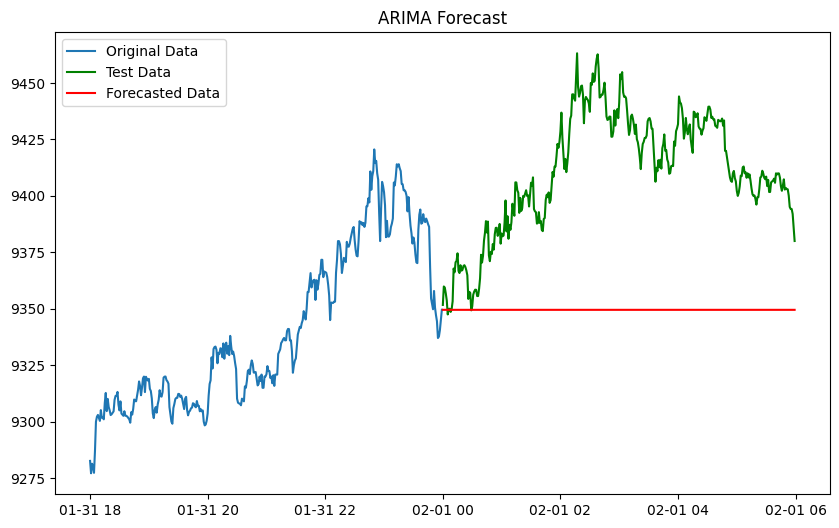

In [15]:
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA

# datetime을 기준으로 훈련/테스트 데이터 분할
reset_df = df.reset_index()
train = reset_df[reset_df['date'].dt.month == 1].reset_index(drop=True).set_index('date')['value']
test = reset_df[reset_df['date'].dt.month == 2].reset_index(drop=True).set_index('date')['value']

# ARIMA 모델 학습 (DatetimeIndex 그대로 사용)
model = ARIMA(train, order=(1, 1, 0))
model_fit = model.fit()

# 예측
forecast = model_fit.forecast(steps=len(test))

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(train.tail(360), label='Original Data')
plt.plot(test.index, test.values, color='green', label='Test Data')
plt.plot(test.index, forecast, color='red', label='Forecasted Data')
plt.legend()
plt.title('ARIMA Forecast')
plt.show()



# 통계 (40점)

### 통계1      
자동차 A,B,C에 대해 유저 9명의 선호도(1~6, 6은 가장선호,1은 가장 비선호)를 표시했다.    
자동차 간의 선호도 차이가 존재하는지 검정하라     

<table>
<tr>
    <th></th>
    <td>차량 A</td>
    <td>차량 B</td>
    <td>차량 C</td>  
</tr>

<tr>
    <td>피험자1</td>
    <td>4</td>
    <td>1</td>
    <td>6</td>
</tr>
<tr>
    <td>피험자2</td>
    <td>3</td>
    <td>4</td>
    <td>6</td>
</tr>
<tr>
    <td>피험자3</td>
    <td>2</td>
    <td>4</td>
    <td>6</td>
</tr>
    <tr>
    <td>피험자4</td>
    <td>4</td>
    <td>3</td>
    <td>2</td>
</tr>
    <tr>
    <td>피험자5</td>
    <td>4</td>
    <td>1</td>
    <td>6</td>
</tr>
    <tr>
    <td>피험자6</td>
    <td>6</td>
    <td>4</td>
    <td>2</td>
</tr>
    <tr>
    <td>피험자7</td>
    <td>5</td>
    <td>3</td>
    <td>5</td>
</tr>
    <tr>
    <td>피험자8</td>
    <td>6</td>
    <td>3</td>
    <td>2</td>
</tr>
    <tr>
    <td>피험자9</td>
    <td>2</td>
    <td>4</td>
    <td>6</td>
</tr>
</table>  

(1) 가설설정     
(2) 검정 통계량 확인 및 가설검정

In [17]:
from scipy.stats import friedmanchisquare
import numpy as np
s,p = friedmanchisquare([4,3,2,4,4,6,5,6,2],[1,4,4,3,1,4,3,3,4],[6,6,6,2,6,2,5,2,6])
print(s,p)

1.7714285714285634 0.4124194827001597


### 통계2
dataurl = https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/mock/001_s2.csv
위 데이터는 영화관 이용객의 장르별 팝콘 구매여부에 관한 데이터이다.    
장르별 팝콘 구매 여부가 연관이 있는지 확인하고 싶다.    
(1) 가설설정, 가설 검증      
(2) 장르과 구매여부의 정량적인 상관정도를 구하고 분석하라    

In [18]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/mock/001_s2.csv')
df.head()

,유저ID,장르,구매여부
0,0,액션,구매
1,1,액션,구매
2,2,액션,구매
3,3,액션,구매
4,4,액션,구매


In [19]:
from scipy.stats import chi2_contingency
result =chi2_contingency(pd.crosstab(df['장르'],df['구매여부']))
print(result[1])

4.987377462630171e-14


### 통계 3     
어느 도시에서 성인 전체의 25%가 흡연자라고 한다. 만약 현재도 이와 비슷한 비율이 유지된다면 1300명의 성인표본에서 흡연자가 317명보다 작을 확률은 얼마인가?

In [20]:
import numpy as np
from scipy.stats import norm # 샘플 1300명
p = 0.25
n = 1300
x = 317

# P(X < 317)

sd = np.sqrt((p * (1-p)) /n)
p_x = x / n

prob = norm.cdf(p_x, p, sd)
prob

np.float64(0.30418201463044886)

### 통계 4     
어떤 앱 개발 회사가 새로운 게임을 출시했다. 사용자가 게임 내에서 특정 퀘스트를 클리어하는 성공 확률이 0.3이라고 한다.    
(1) 사용자가 총 3회의 성공을 하기까지 시도한 횟수가 5회 미만일 확률은 얼마인가?         
(2) 사용자가 4번의 퀘스트 클리어 성공을 경험하기까지 평균적으로 몇 번의 시도를 하는가?    

In [21]:
# 음이항 분포 : R번째 성공을 위한 시도 횟수
from scipy.stats import nbinom

p = 0.3

# 1) 총 3회 성공하기 까지의 시도가 P(X < 5)
r = 3

# R번째 (3번쨰)의 성공이 K번째 시행에서 이루어질 확률
# 3회 성공 = 최소 4번 이하의 시도
nbinom.cdf(4-r, r, p)


np.float64(0.0837)

### 통계5    
데이터는 년도별 플로리다에서 발생한 상어 공격 횟수와 해당 연도의 인구수이다.
일반화선형모형을 이용하여 년도별 인구에 따른 상어공격 수에 대한 모델링을 진행하라
(포아송 분포를 고려하여 모델링을 하고 오프셋은 인구를 1000으로 나눈 후 로그를 씌운값으로 진행하라.)   
(1) 모델링 후 모델에 대한 분석을 진행하라.(시각화포함)     
(2) 2000년도에 인구가 16224544라고 할 때 상어 공격횟수를 예측한 값을 출력하라    

In [23]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/mock/001_s5.csv')
df.head()

,Year,Population,Attacks
0,1946,2473000,0
1,1947,2539000,1
2,1948,2578000,0
3,1949,2668000,0
4,1950,2771305,1


In [28]:
import statsmodels.api as sm
df['offset'] = np.log(df['Population'] / 1000)

X = df['Year']
y = df['Attacks']

add_x = sm.add_constant(X)
# 모형에 add_x넣기
poisson_model = sm.GLM(y, add_x, offset = df['offset'] , family = sm.families.Poisson())

result = poisson_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Attacks   No. Observations:                   54
Model:                            GLM   Df Residuals:                       52
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -142.38
Date:                Wed, 20 Aug 2025   Deviance:                       119.11
Time:                        05:24:23   Pearson chi2:                     118.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.6573
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.8845      8.658     -7.956      0.000     -85.854     -51.915
Year           0.0312      0.004      7.148      0.000       0.023       0.040
==============================================================================
"""

In [29]:
#  2000년도에 인구가 16224544라고 할 때 상어 공격횟수를 예측한 값을 출력
result.predict([1,2000],offset = np.log(16224544/1000))

array([23.51581604])